In [1]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/My Courses/Yolov8-seg

/content/drive/My Drive/My Courses/Yolov8-seg


In [3]:
#setting up the environment
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
ROOT_PATH = "/content/drive/My Drive/My Courses/Yolov8-seg"

In [6]:
!pwd

/content/drive/My Drive/My Courses/Yolov8-seg


In [7]:

%cd "/content/drive/My Drive/My Courses/Yolov8-seg"

/content/drive/My Drive/My Courses/Yolov8-seg


In [8]:

!pwd

/content/drive/My Drive/My Courses/Yolov8-seg


In [9]:
!ls

cell_data  data.yaml  runs  yolov8m-seg.pt  yolov8s-seg.pt


In [13]:
#training the model
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 100MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

In [26]:
#Validate Custom Model
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/valid/images data=data.yaml save=tru

2024-04-25 09:46:43.755700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 09:46:43.755758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 09:46:43.757844: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 09:46:45.178667: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/My Courses/Yolov8-seg/cell_data/valid/labels.cache... 

In [15]:
#Inference with Custom Model
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/test/images save=tru

2024-04-25 09:35:59.879883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 09:35:59.879948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 09:35:59.882040: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 09:36:01.791150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
image 1/5 /content/drive/MyDrive/My Courses/Yolov8-seg/cell_data/test/images/cc1_jpg.rf.f67

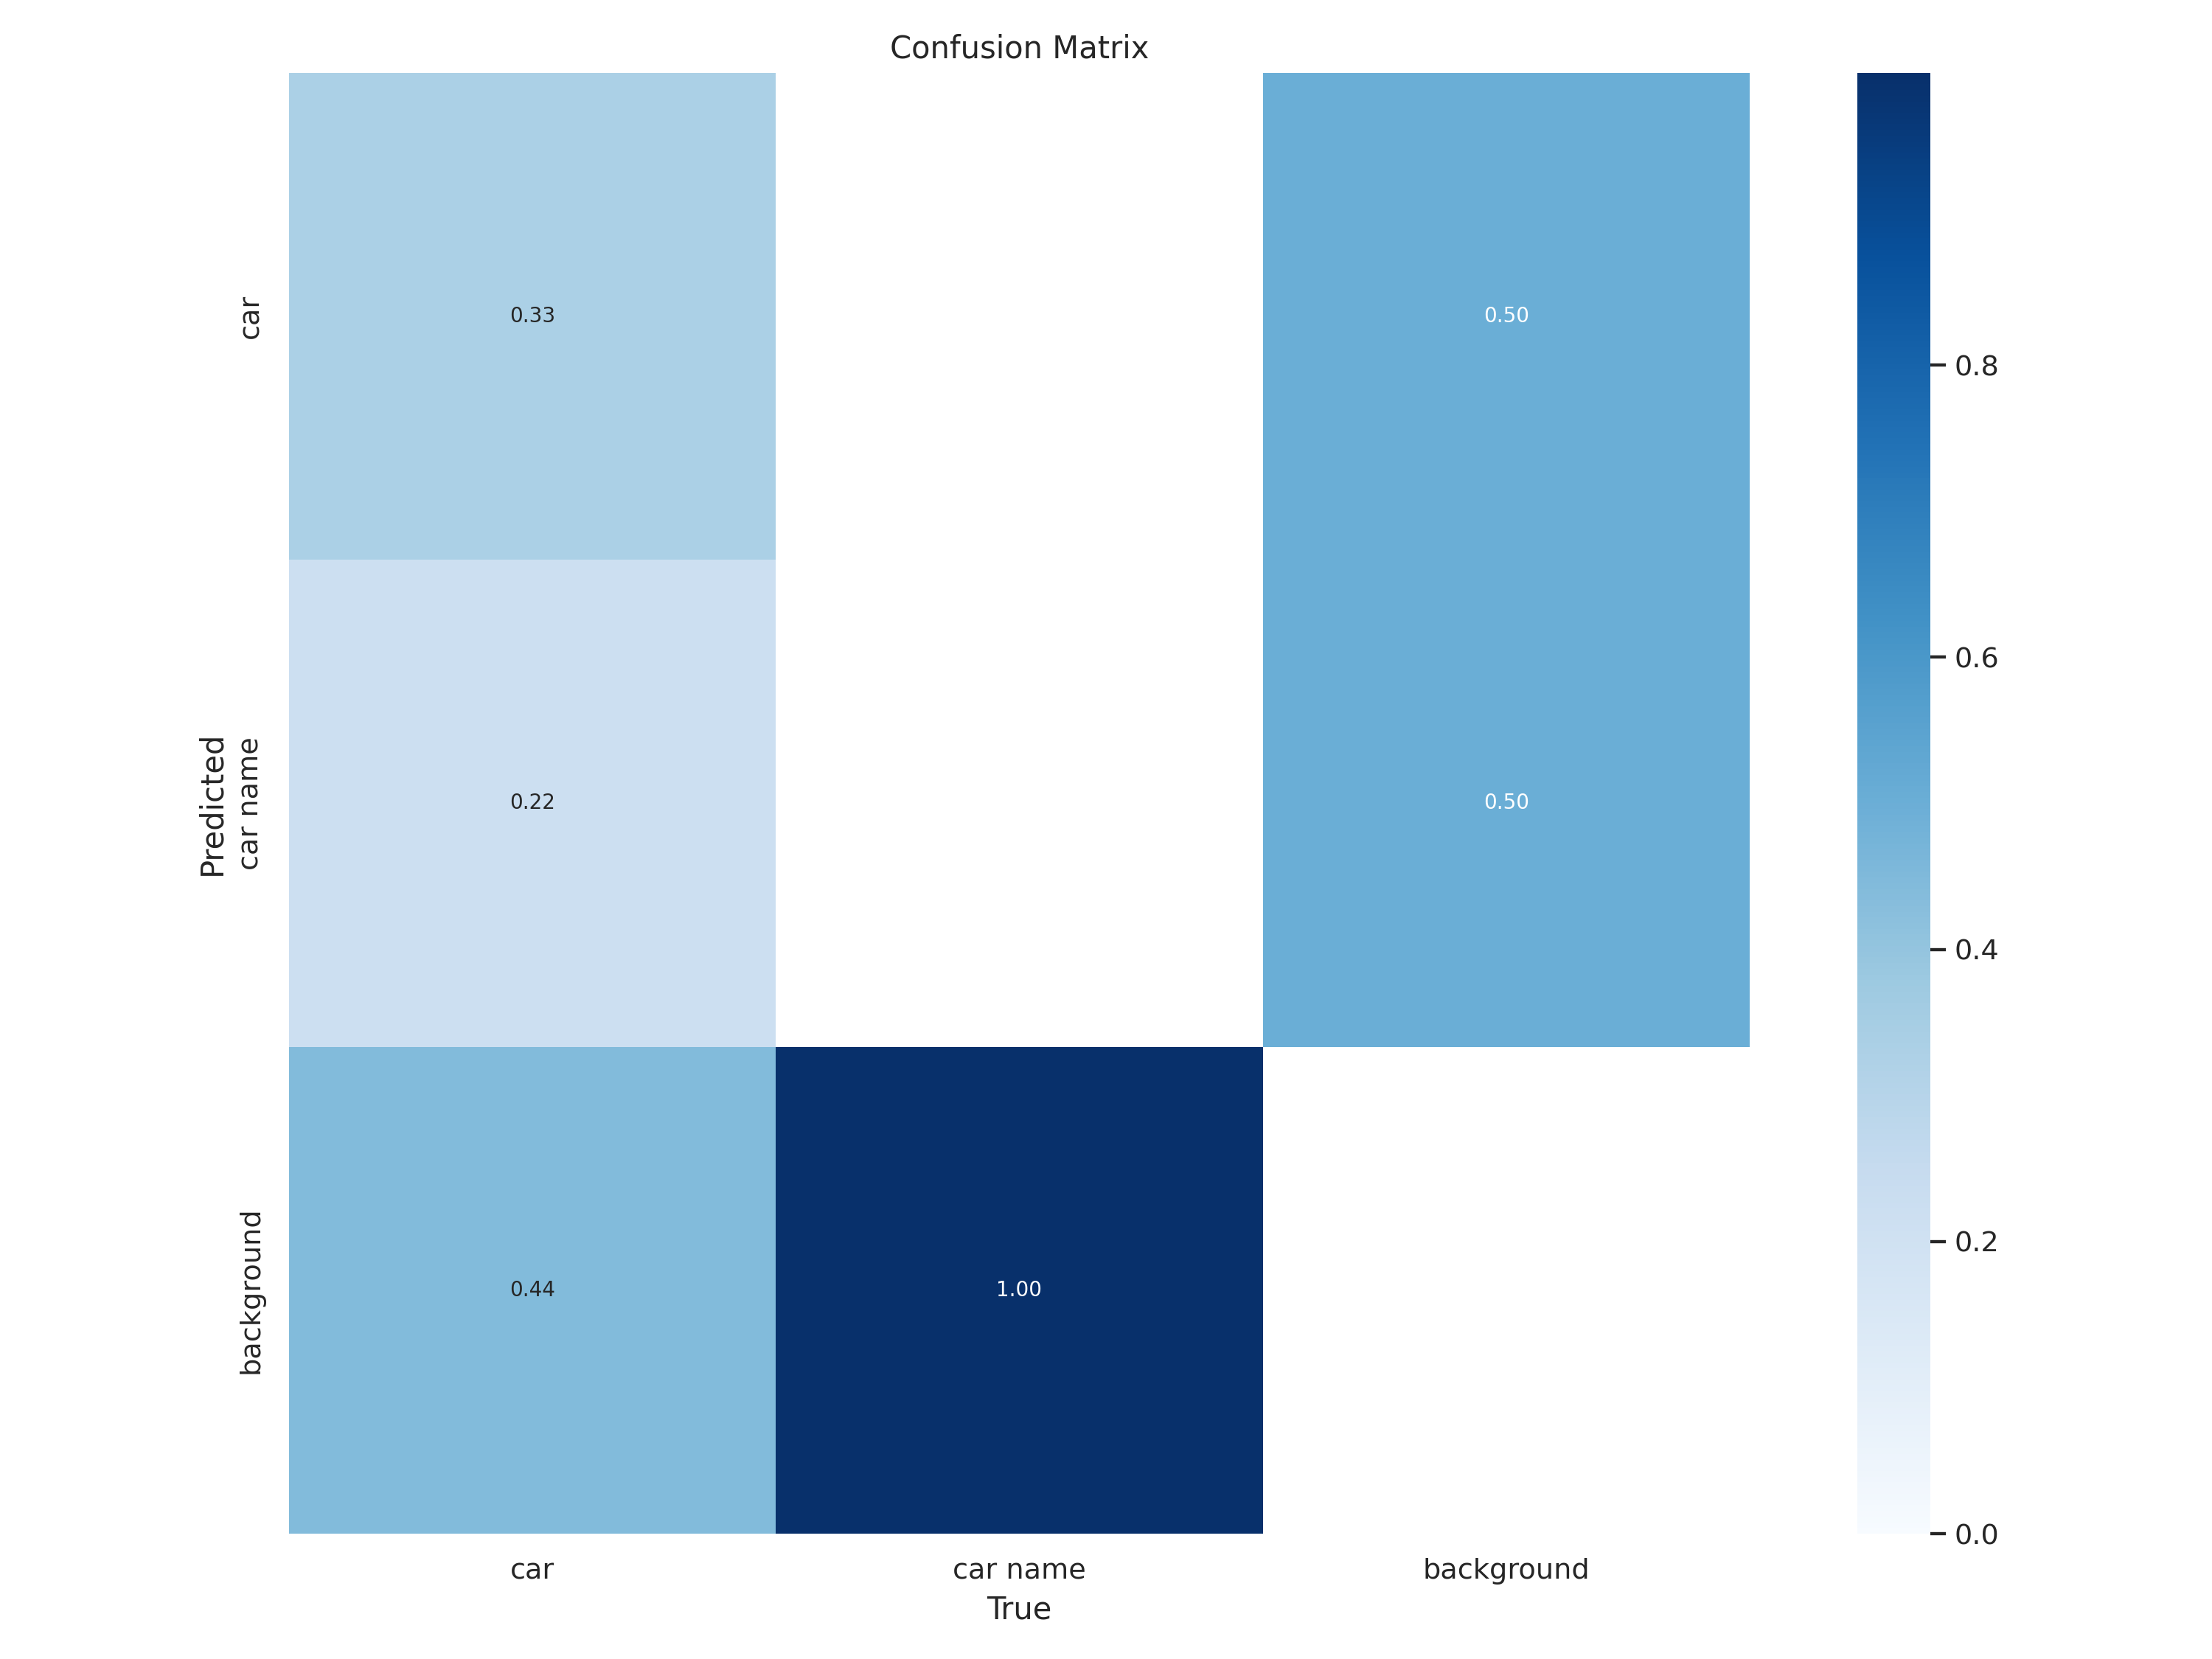

In [16]:
#displaying the confusion matrix
Image(filename='/content/drive/MyDrive/My Courses/Yolov8-seg/runs/segment/train/confusion_matrix.png', width=600)

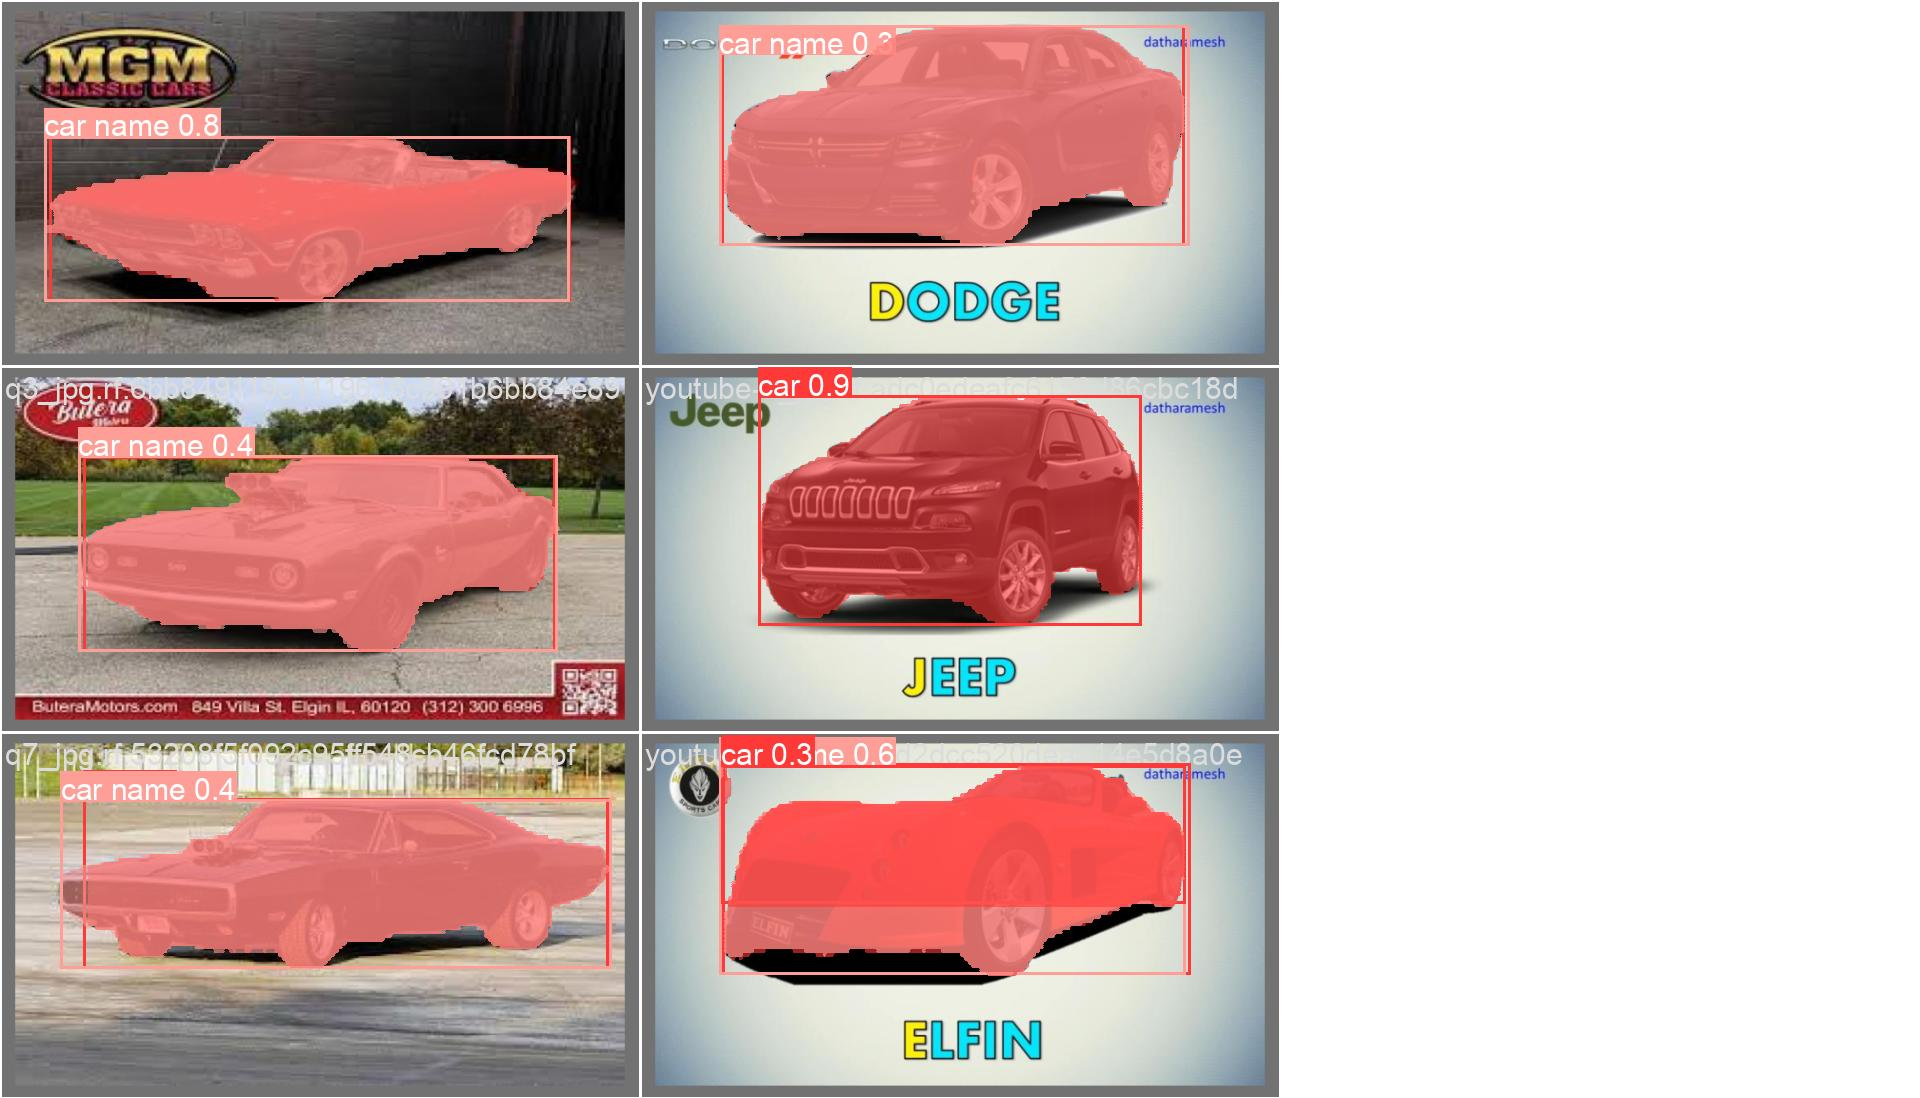

In [19]:
#displaying the val images
Image(filename='/content/drive/MyDrive/My Courses/Yolov8-seg/runs/segment/train/val_batch0_pred.jpg', width=600)


In [21]:
import pandas as pd

In [23]:
results=pd.read_csv('/content/drive/MyDrive/My Courses/Yolov8-seg/runs/segment/train/results.csv')

In [24]:
results

,epoch,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,...,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.94320,7.5825,6.3061,2.1825,...,2.1603,1.7499,0.099100,0.000100,0.000100
1,1,1.77820,6.3519,5.4635,1.9229,...,2.0962,1.7521,0.097270,0.000270,0.000270
2,2,1.66480,5.2179,4.9304,1.7805,...,2.0390,1.7606,0.095401,0.000401,0.000401
3,3,1.44330,4.5731,4.4578,1.7170,...,2.0276,1.7500,0.093492,0.000492,0.000492
4,4,1.64660,4.6854,4.1324,1.9104,...,2.0349,1.7506,0.091544,0.000544,0.000544
5,5,1.24840,3.9716,3.3551,1.5155,...,2.0726,1.7179,0.089556,0.000556,0.000556
6,6,1.16310,3.5950,2.9162,1.5299,...,2.0384,1.6529,0.087528,0.000528,0.000528
7,7,1.22430,3.5393,2.7351,1.5391,...,2.1446,1.2637,0.085461,0.000461,0.000461
8,8,1.02980,3.8319,2.5670,1.3537,...,2.0884,1.2908,0.083354,0.000354,0.000354
9,9,0.96589,3.3083,2.6380,1.3816,...,2.0109,1.3949,0.081207,0.000207,0.000207
